# Data Mining Project - Group XX 2025/2026

# Import Libraries

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

#o svg consegue ampliar infinitamente os gráficos sem perder qualidade mas às vezes é mais lento 
#por isso agora usamos retina


sns.set()

# Loading the Data

Import the datasets from csv files using commas as separators of the columns and setting the unique customer identifier as the index of both columns.

In [2]:
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv', sep = ",", index_col= "Loyalty#")
customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv', sep = ",", index_col= "Loyalty#")
metaData = pd.read_csv('DM_AIAI_Metadata.csv', sep = ";", header= None)

Remove the 'Unnamed' column referring to a sequential numbering of the rows, as we set the column "Loyalty#" as the index

In [3]:
customerDB = customerDB.iloc[:, 1:]
customerDB

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard


# Metadata

**FlightsDB Database Variable Description**
- **Loyalty#:**	Unique customer identifier linking to CustomerDB
- **Year:**	Year of flight activity record
- **Month:**	Month of flight activity record (1-12)
- **YearMonthDate:**	First day of the month for the activity period
- **NumFlights:**	Total number of flights taken by customer in the month
- **NumFlightsWithCompanions:**	Number of flights where customer traveled with companions
- **DistanceKM:**	Total distance traveled in kilometers for the month
- **PointsAccumulated:**	Loyalty points earned by customer during the month
- **PointsRedeemed:**	Loyalty points spent/redeemed by customer during the month
- **DollarCostPointsRedeemed:**	Dollar value of points redeemed during the month

**CustomerDB Database Variable Description**
- **Loyalty#:**  Unique customer identifier for loyalty program members
- **First Name:**   Customer's first name
- **Last Name:**   Customer's last name 
- **Customer Name:** Customer's full name (concatenated)
- **Country:**	Customer's country of residence
- **Province or State:**	Customer's province or state
- **City:**	Customer's city of residence
- **Latitude:**	Geographic latitude coordinate of customer location
- **Longitude:**	Geographic longitude coordinate of customer locatio
- **Postal code:**	Customer's postal/ZIP code
- **Gender:**	Customer's gender
- **Education:**	Customer's highest education level (Bachelor, College, etc.)
- **Location:** Code	Urban/Suburban/Rural classification of customer residence
- **Income:**	Customer's annual income
- **Marital Status:**	Customer's marital status (Married, Single, Divorced)
- **LoyaltyStatus:**	Current tier status in loyalty program (Star > Nova > Aurora)
- **EnrollmentDateOpening:**	Date when customer joined the loyalty program
- **CancellationDate:**	Date when customer left the program
- **Customer Lifetime:** Value	Total calculated monetary value of customer relationship
- **EnrollmentType:**	Method of joining loyalty program

## Descriptive Statistics and Visualisations (FlightsDB)

This section starts by split our data in metric and non-metric features

In [17]:
non_metric_features_FDB = ["YearMonthDate"]
metric_features_FDB = flightsDB.columns.drop(non_metric_features_FDB).to_list()
continuous_FDB = ["DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

print("Metric Features:")
for i, feature in enumerate(metric_features_FDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_FDB, 1):
    print(f" {i}. {feature}")

Metric Features:
 1. Year
 2. Month
 3. NumFlights
 4. NumFlightsWithCompanions
 5. DistanceKM
 6. PointsAccumulated
 7. PointsRedeemed
 8. DollarCostPointsRedeemed

Non-Metric Features:
 1. YearMonthDate


### Histograms

Create histograms for a general analysis of the features. We have only applied a smooth line on the histograms that plot variables that have continuous values to avoid any misleading.

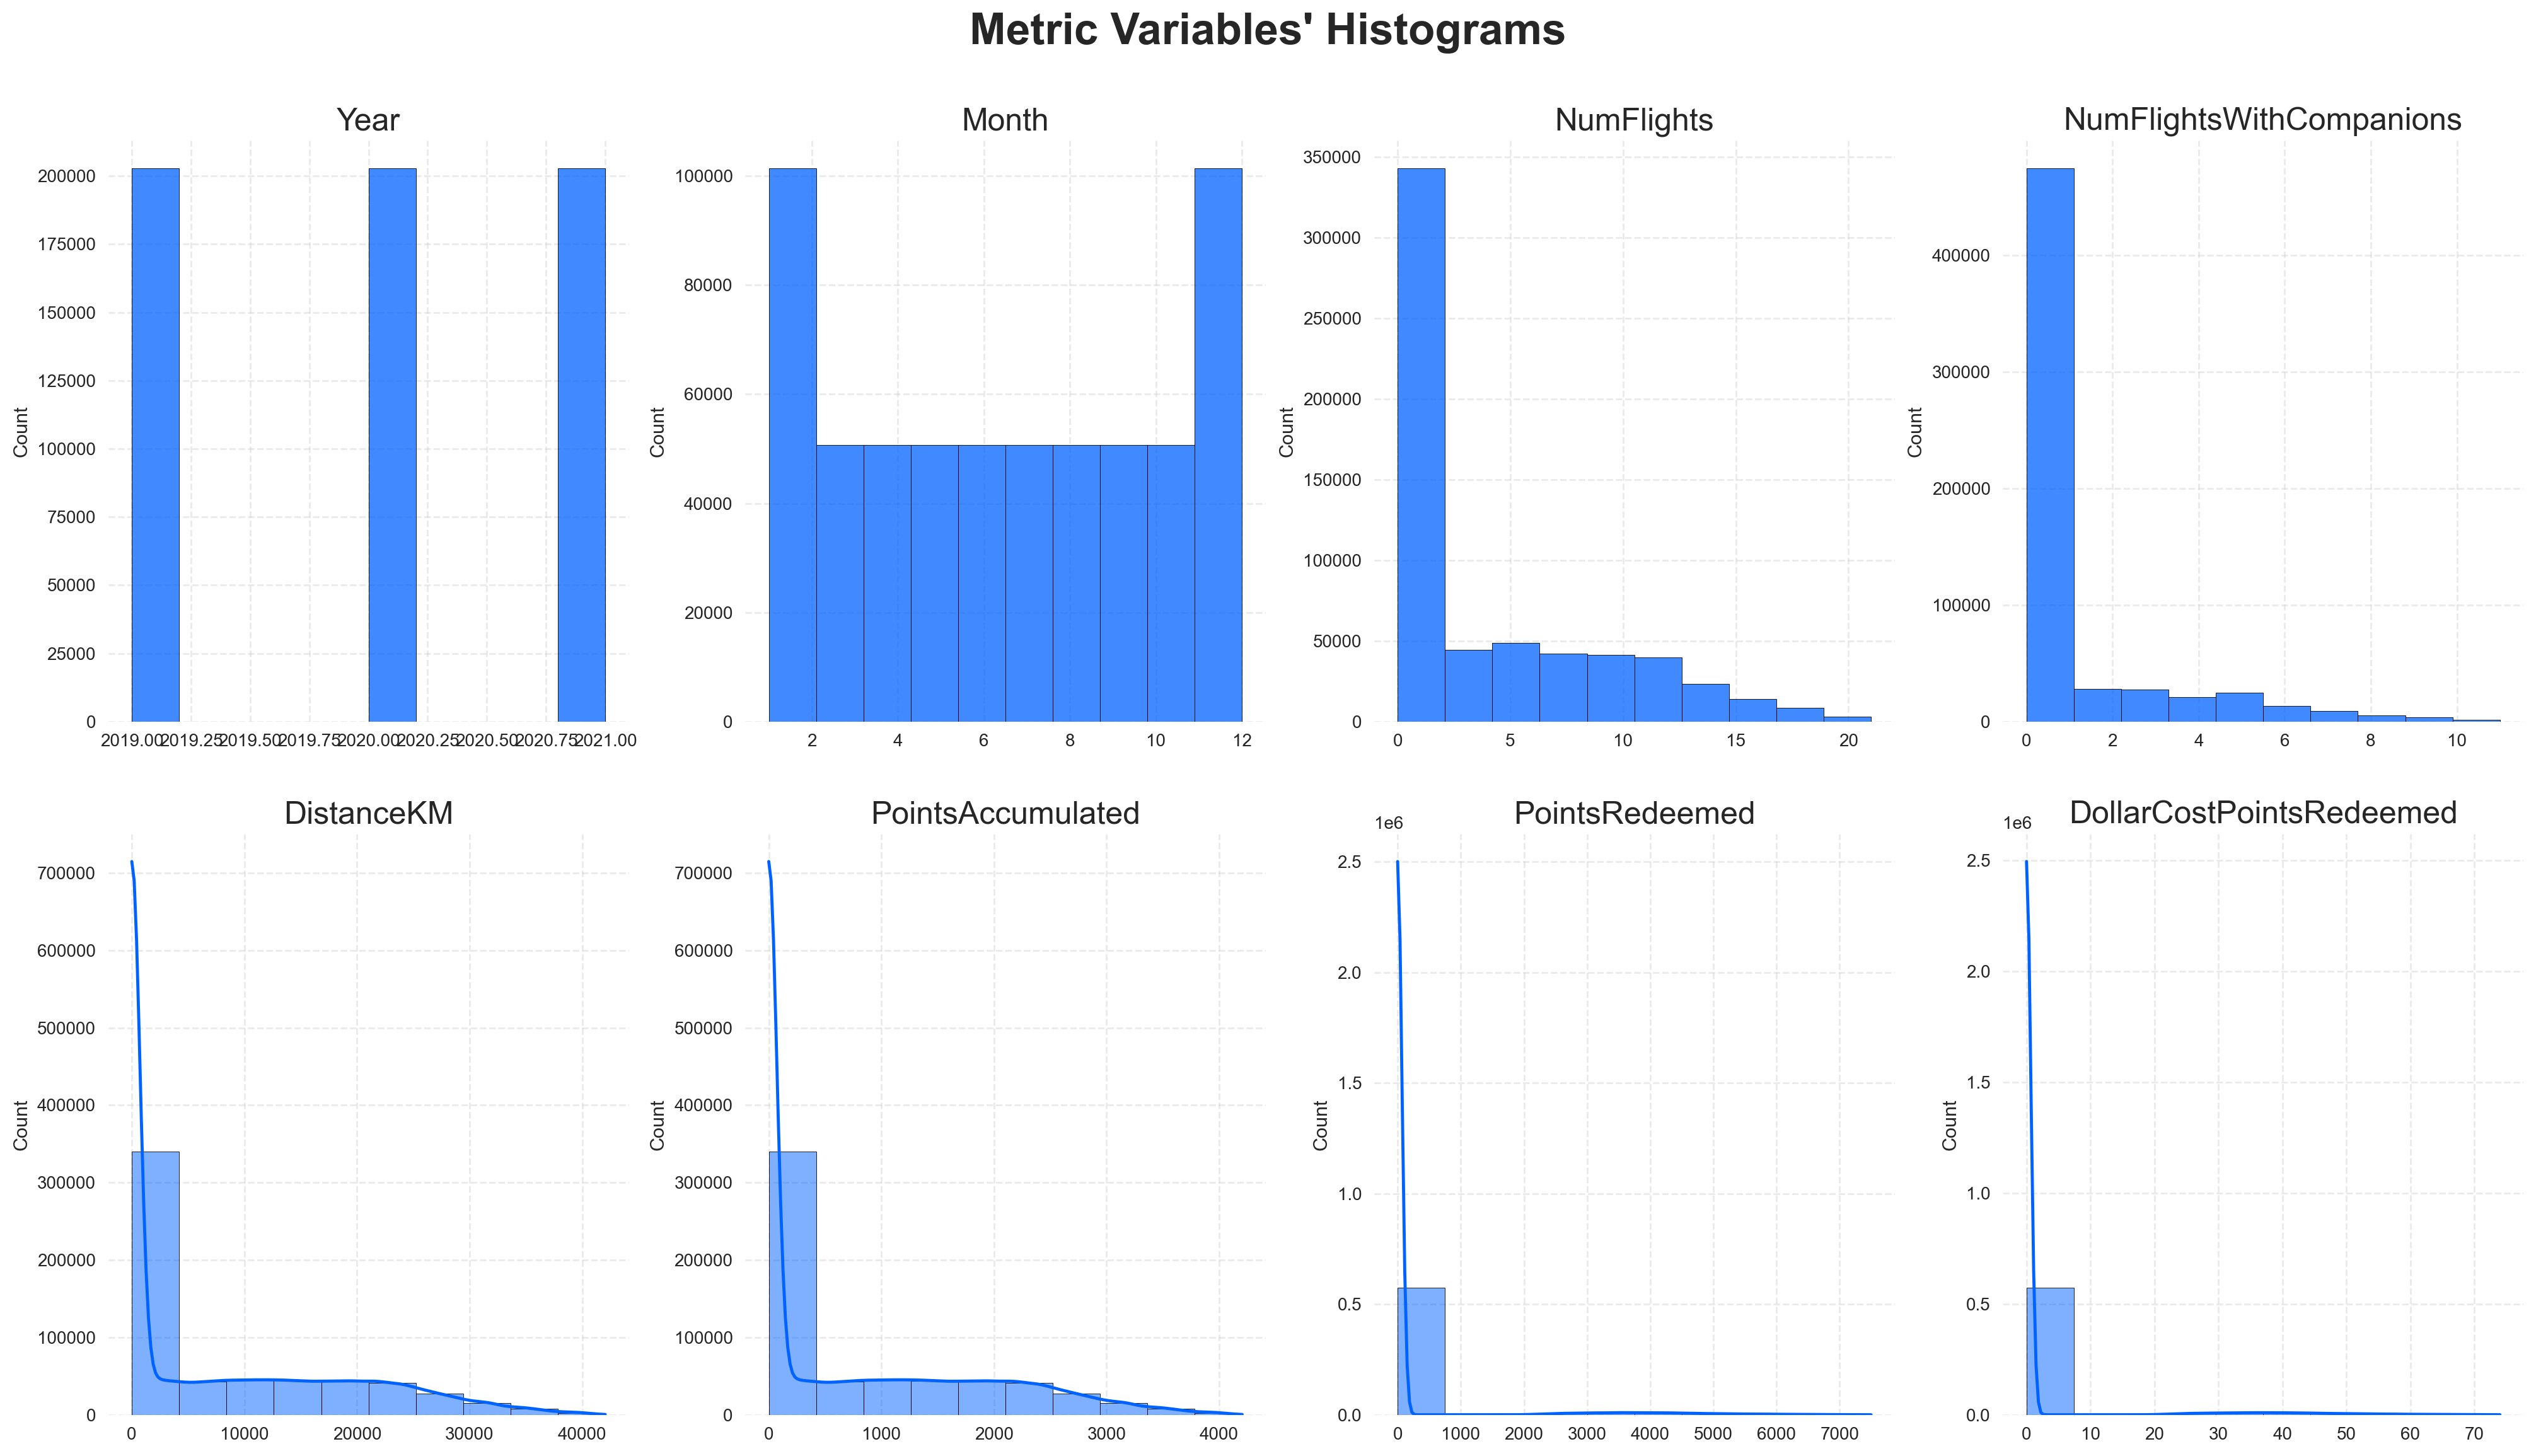

In [35]:
# Set number of rows and columns
sp_rows_FDB = 2
sp_cols_FDB = ceil(len(metric_features_FDB) / sp_rows_FDB)

# Set style
sns.set_style("white") # increase contrast

# Create figure
fig, axes = plt.subplots(sp_rows_FDB,
                         sp_cols_FDB,
                         figsize=(20, 11),
                         constrained_layout=True)

# Additional spacing between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features_FDB):
    
    sns.histplot(flightsDB[feat],
                 bins=10,
                 kde=(feat in continuous_FDB), #smooth line only for continuous variables
                 ax=ax,
                 color="#0062FF",
                 edgecolor="black")
    
    ax.set_title(feat, fontsize=18)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_xlabel("")

# Global title
plt.suptitle("Metric Variables' Histograms",
             fontsize=25,
             fontweight="bold",
             y=1.05)

# Save figure
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)
fig.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'),
            dpi=200)

# display output
plt.show()


From the histograms above we can see that:

- `Year:` The data is distributed only between 2019 and 2021, indicating that the set covers three years of operations. The number of records is similar between years, suggesting consistency in data collection over time.
- `Month:` he frequency of the first few months and the last ones is higher than the middle months. Also, the middle months have all the same frequency, this is the distribution is almost uniform across this months;
- `Number of Flights and Flights with Companions:` Most customers make few trips (1 to 3 flights). Few customers travel frequently—they are the outliers;
- `Distance KM:` Most flights are short-haul. There are some long-haul flights that can represent the outliers;
- `Points Accumulated:` Only a few customers accumulate many points;
- `Points Redeemed:` Many customers do not redeem points or redeem very few;
- `Dollar Cost Points Redeemed:` The financial use of points is uncommon, this means only a few customers redeem points by converting them into cash. When they do, the amounts vary widely.

### Boxplots

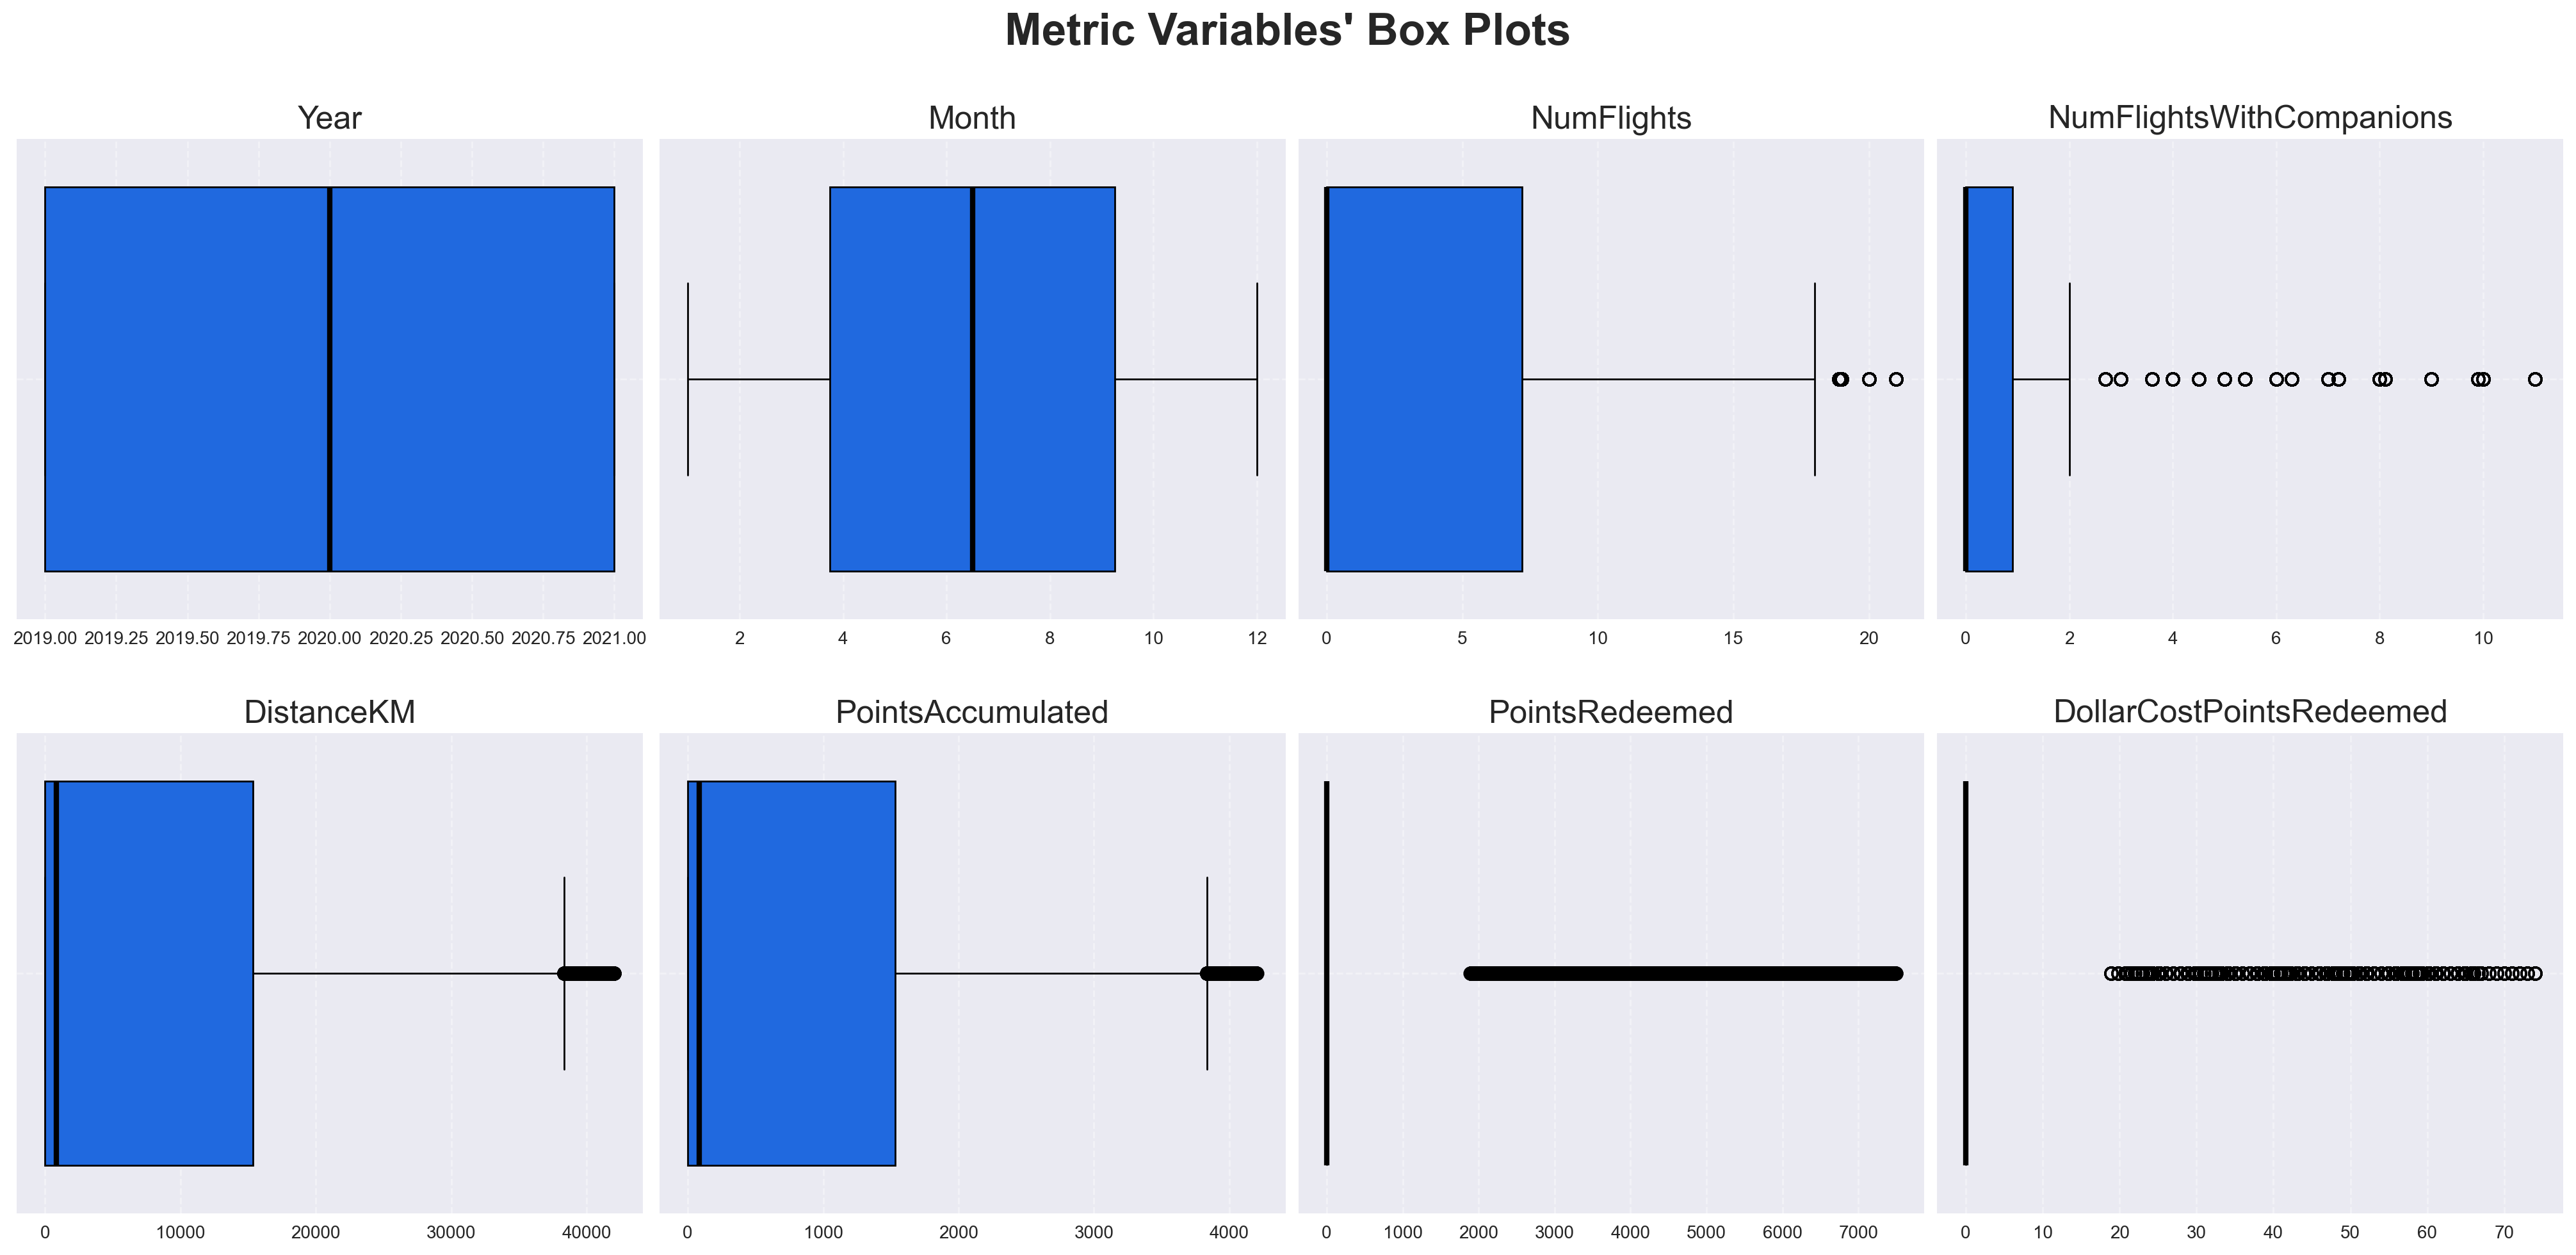

In [14]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows_FDB, 
                         sp_cols_FDB, 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features_FDB): 
    sns.boxplot(x=flightsDB[feat], ax=ax,
                # Set inside color to blue
                color="#0062FF",
                # Set line colors to black
                boxprops=dict(edgecolor="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                medianprops=dict(color="black", linewidth=3),
                flierprops=dict(markeredgecolor="black"))
    
    # Put grid with low opacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)

    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=18)

    # Hide x label since we already have the boxlplot title at the top
    ax.set_xlabel("")
    
# Layout
# Add title and make it bigger
plt.suptitle("Metric Variables' Box Plots", 
             fontsize = 25, fontweight="bold")

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)

# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

# Show plot
plt.show()

From the boxplots above we can conclude that:

- `Year:` The values are evenly distributed between 2019 and 2021, with no outliers;
- `Month:` The distribution is almost uniform, with slight asymmetry (probably more records in the first and last few months).
- `Number of Flights:` Low median and strong skew to the right (positive asymmetry). Many outliers above ~15 flights — few customers travel frequently;
- `Number of Flights with Companions:` Median close to 0 and some outliers that represent the clients that travel in big groups;
- `Distance KM:` large number of short flights and a few very long ones that greatly influence the average;
- `Points Accumulated:` Very low median and a lot of outliers. This means that only a few customers accumulate large volumes of points;
-`Points Redeemed:` The same as before, a very big majority of values are low with a big number of outliers;
- `Dollar Cost Points Redeemed:` A very similar distribution to 'Points Redeemed' as expected, with the majority of values being close to 0 and many outliers.

## Descriptive Statistics and Visualisations (CustomerDB)

Create 2 lists to differentiate from metric and non-metric features.

In [24]:
metric_features_CDB = customerDB.select_dtypes(include=['number']).columns.tolist()
continuous_CDB = ["Latitude", "Longitude", "Income", "Customer Lifetime Value"]
non_metric_features_CDB = customerDB.columns.drop(metric_features_CDB).to_list()

print("Metric Features:")
for i, feature in enumerate(metric_features_CDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_CDB, 1):
    print(f" {i}. {feature}")

Metric Features:
 1. Latitude
 2. Longitude
 3. Income
 4. Customer Lifetime Value

Non-Metric Features:
 1. First Name
 2. Last Name
 3. Customer Name
 4. Country
 5. Province or State
 6. City
 7. Postal code
 8. Gender
 9. Education
 10. Location Code
 11. Marital Status
 12. LoyaltyStatus
 13. EnrollmentDateOpening
 14. CancellationDate
 15. EnrollmentType


### Histograms

Create histograms for a general analysis of the features. Since all metric variables here are continuous, we have applied a smooth line to all.

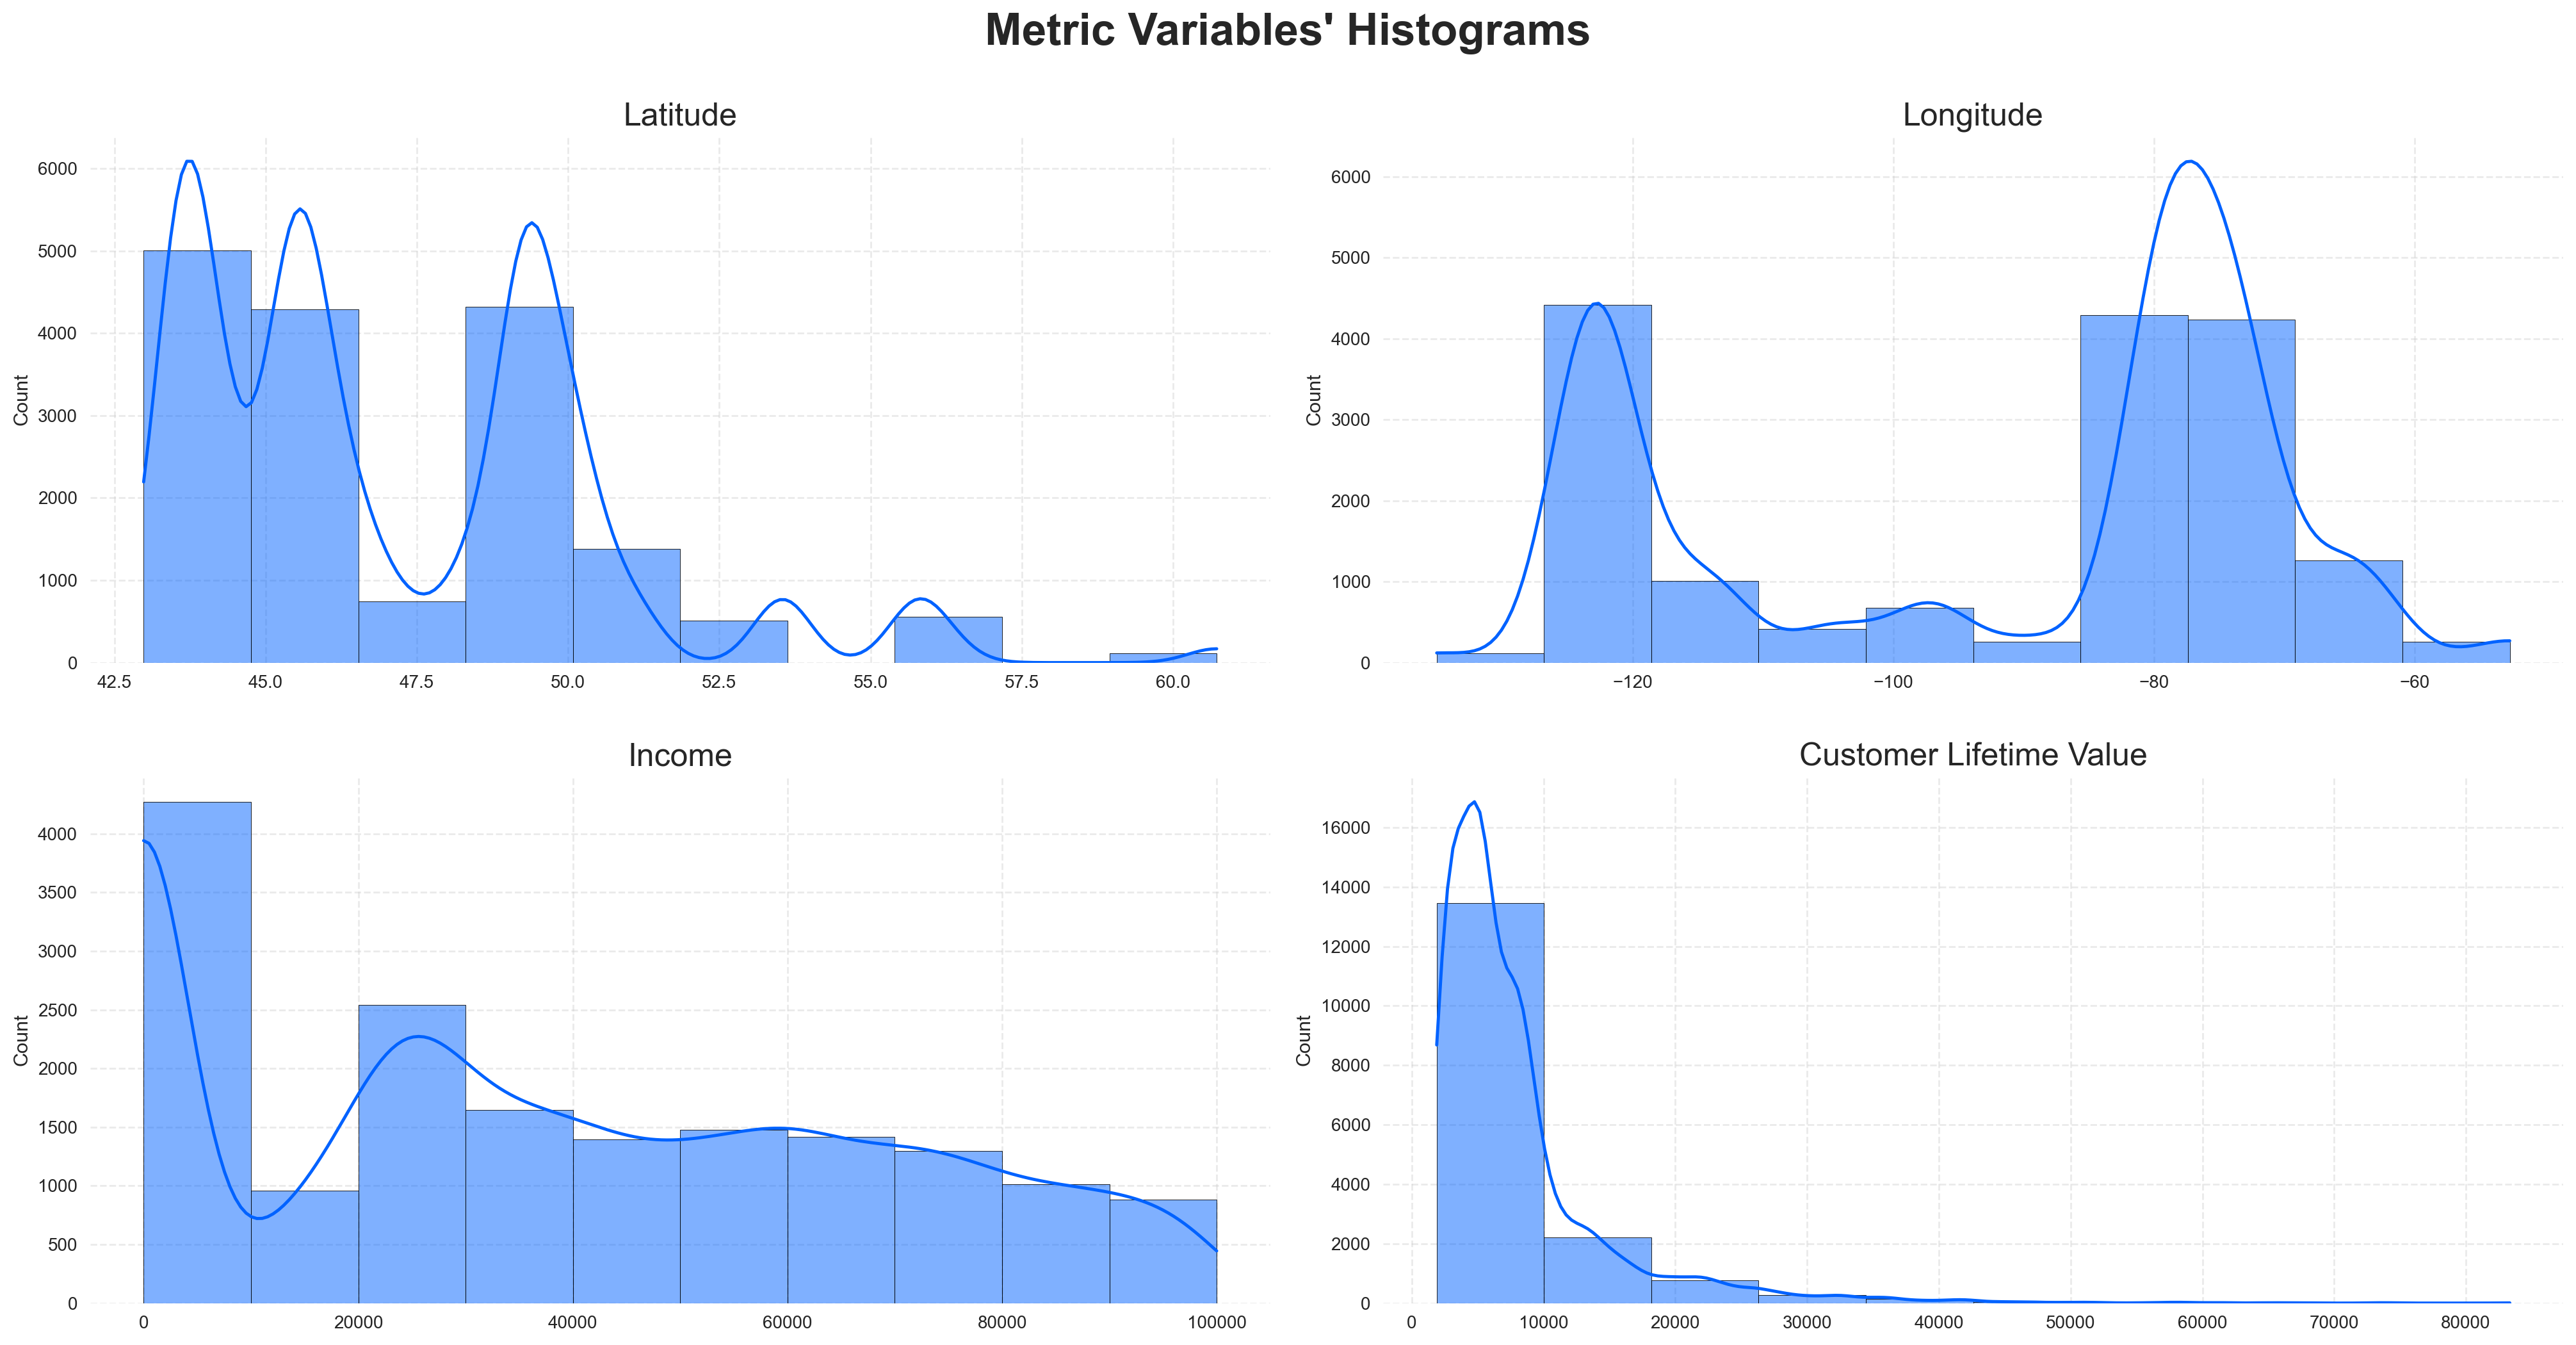

In [ ]:
# Set number of rows and columns
sp_rows_CDB = 2
sp_cols_CDB = ceil(len(metric_features_CDB) / sp_rows_CDB) # adapt the number of columns to the number of features

# Set minimal style
sns.set_style("white") # increase contrast

# Create a canvas for the metric features
fig, axes = plt.subplots(sp_rows_CDB, 
                         sp_cols_CDB, 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot the data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features_CDB):
    sns.histplot(customerDB[feat],
                 bins=10,
                 kde=(feat in continuous_CDB), #smooth line only for continuous variables
                 ax=ax,
                 color="#0062FF",
                 edgecolor="black")
    ax.set_title(feat, fontsize=18)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_xlabel("")

# Layout
# Add title, make it bigger and bold and add space between title and first row of plots
plt.suptitle("Metric Variables' Histograms", 
             fontsize = 25, fontweight="bold", y=1.05)

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)
    
# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# Show plot
plt.show()

From the histograms above we can see that:

- `Latitude:`Latitude shows a right skewed distribution, with very inconsistent values.

- `Longitude:` There is a concentration of values on the extremes.

### Boxplots

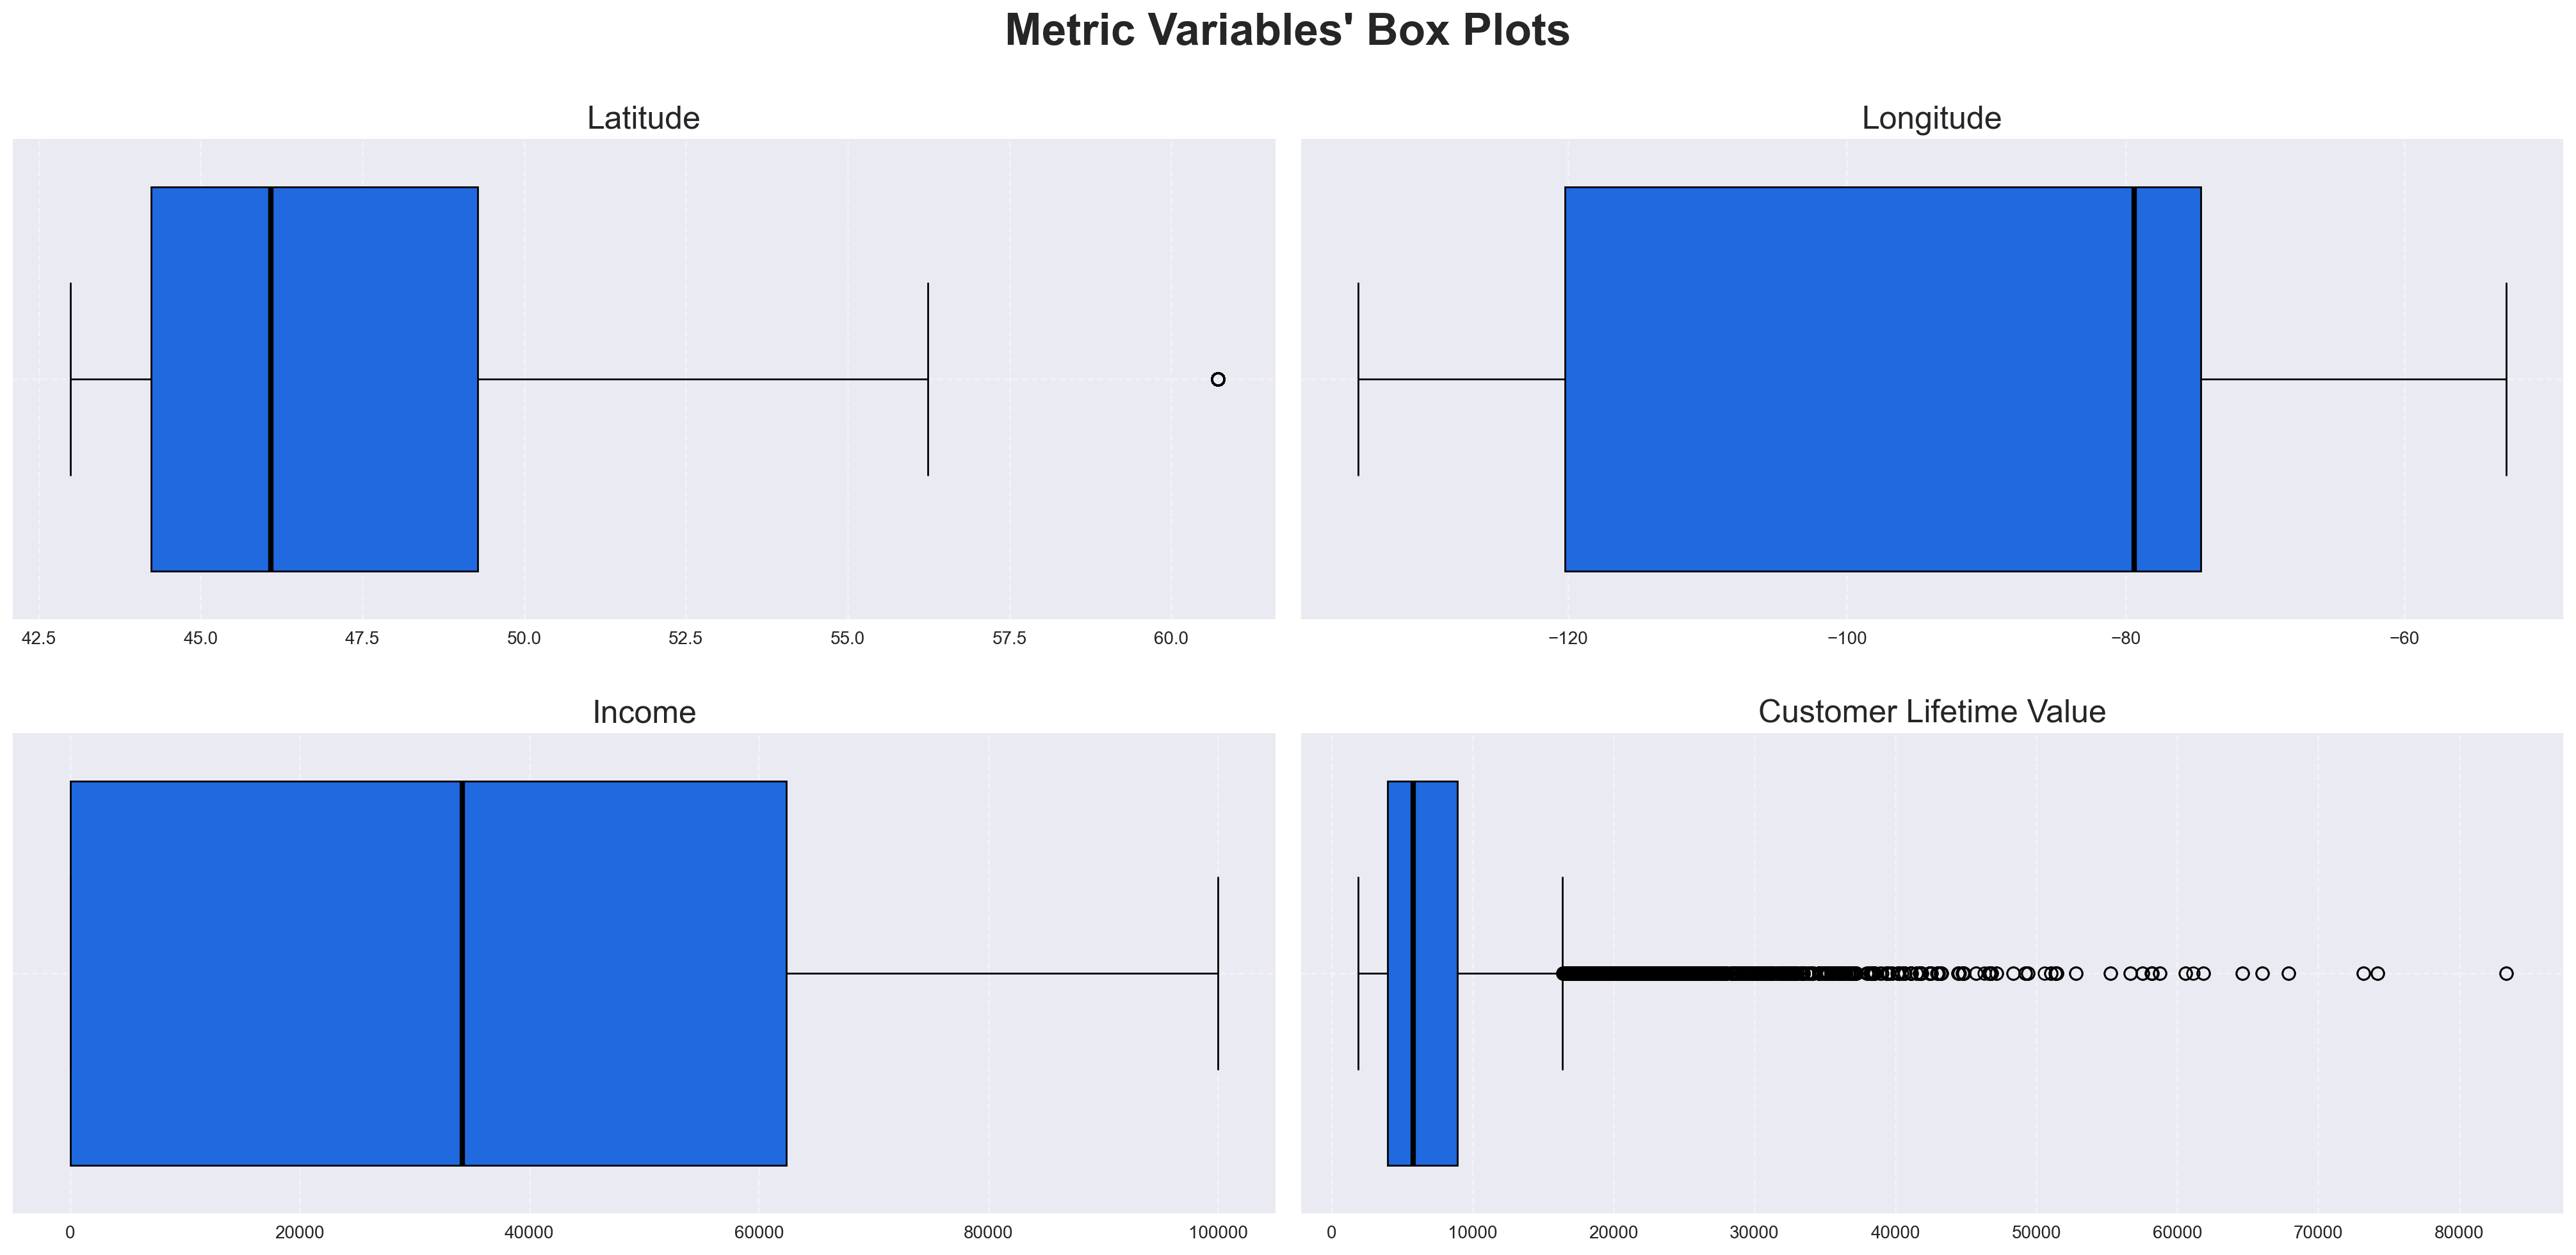

In [13]:
# Create canvas with the same structure as before
fig, axes = plt.subplots(sp_rows_CDB, 
                         sp_cols_CDB, 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features_CDB):
    # We need to reset the index to avoid errors since we haven't dealt with duplicate values yet
    sns.boxplot(x=customerDB[feat].reset_index(drop= True), ax=ax, 
                # Set inside color to blue
                color="#0062FF",
                # Set line colors to black
                boxprops=dict(edgecolor="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                medianprops=dict(color="black", linewidth=3),
                flierprops=dict(markeredgecolor="black")) 
    
    # Put grid with low opacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)

    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=18)

    # Hide x label since we already have the boxlplot title at the top
    ax.set_xlabel("") 

# Layout
# Add a centered title to the figure and plot it
plt.suptitle("Metric Variables' Box Plots", 
             fontsize = 25, fontweight="bold")

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)

# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# Show plot
plt.show()

From the boxplots above we can conclude that:

- `Latitude:` The values range between ~43-56.5°, with most values on the higher latitudes and one outlier more up north.
- `Longitude:` Values between -140° and -55° with a lot of values on lower longitudes, no outliers.
- The combination of these two features tells us AIA's customers are from North America, more specifically from Canada and the northern states of the USA.
- `Income:` There is a wide range of salaries, a quarter of the customers have income close to zero and another quarter has low-mid income, which pulls the median down and provokes right skewness. No outliers.
- `Customer Lifetime Value:` It's always at least ~1000$ and has a median of around 6000$. Has a very right skewed distribution with lots of outliers that represent the customers that are very profitable and thus important for the company.

We reach the conclusion it is very difficult to take conclusions from histograms and boxplots of the variables **Latitude and Longitude**
Since that together they have more meaning, we can plot them in a Scatter plot to see if there are any clusters of coordinates that could represent cities where our customers are concentrated. 

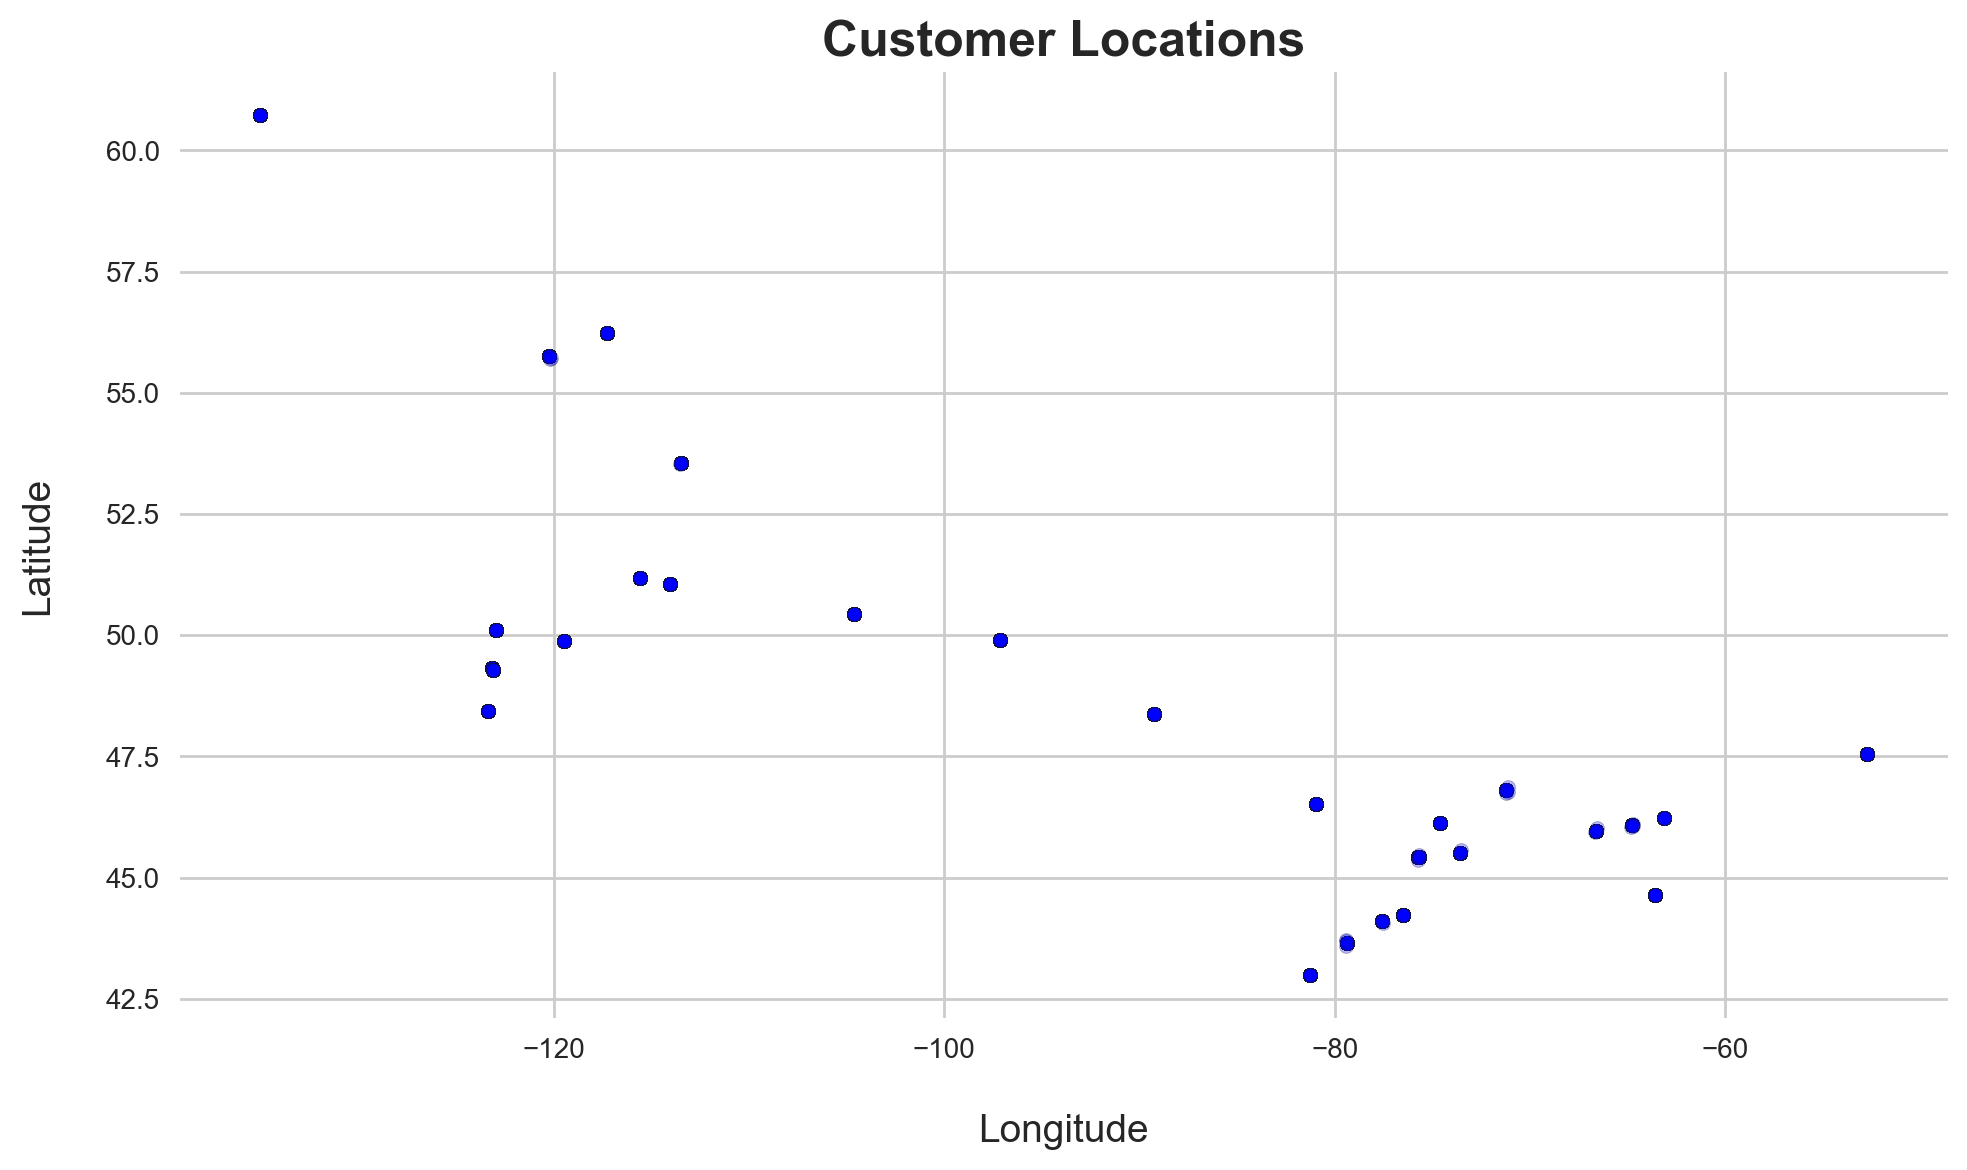

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    customerDB["Longitude"], 
    customerDB["Latitude"], 
    s=25,             # Increased point size
    alpha=0.3,
    c='blue',         
    edgecolor='k'
)
plt.title(
    "Customer Locations",
    fontsize=18,      # Larger title
    fontweight='bold' # Bold title
)
plt.xlabel(
    "Longitude",
    fontsize=14,
    labelpad=18       # Bigger axis title
)
plt.ylabel("Latitude",
            fontsize=14,      # Bigger axis title
            labelpad=18)       # Extra space from y-axis

plt.grid(True)
plt.tight_layout()
plt.show()


The graph is very underwhelming. We were expecting lots of data, but looks like there are very few Latitude-Longitude points, which doesn't allow us to make much conclusions.

In [ ]:
lat_count = customerDB["Latitude"].count()
long_count = customerDB["Longitude"].count()

print(f"Latitude has {lat_count} values.")
print(f"Longitude has {long_count} values.")

In [ ]:
lat_duplicated = customerDB["Latitude"].duplicated().sum()
long_duplicated = customerDB["Longitude"].duplicated().sum()

print(f"The Latitude column has {lat_duplicated} duplicated values, which represents {(lat_duplicated/lat_count*100).round(2)}% of the total data.")
print(f"The Longitude column has {long_duplicated} duplicated values, which represents {(long_duplicated/long_count*100).round(2)}% of the total data.")

This explains why we had so few points in the scatter plot. Let's see what exactly are the values.

In [ ]:
customerDB[["Latitude","Longitude"]].value_counts()

By searching what these coordinates represent on Google Maps, we conclude they identify the city the customer is from and not their exact location, probably for privacy reasons.
For example, the first 3 coordinates represent Toronto, Vancouver and Montreal, which are all Canadian cities.

Since we already have a column that represents the name of the city the customer is from, we conclude the **columns for Latitude and Longitude are redundant**.